# Clmate Data - For NOAA RESTORE

Understanding the impact of climate variability and change is of great importance for developing adaptation and mitigation strategies. Coarse resolution data sets such as simulations of general circulation models (GCMs) are important for reconstructing historical climate and predicting the future. However, scale discrepancy and biases limit the coarse resolution data sets from being directly used for impact assessments and decision making. One solution for bridging this gap is to downscale and bias correct coarse resolution data to the local scale.

We used quantile delta mapping (QDM) to bias correct and downscale 5 popular GCMs outputs for 9 variables including daily precipitation and maximum temperature. These 5 GCMs are archived in the newest generation CMIP6. Compared to quantile mapping method, QDM accounts for the difference between historical and future climate scenario data and thus is capable of preserving trend of the future climate. QDM has been widely used to bias correct climate variables in recent studies, which indicated better performance compared to the other bias correction approaches. We chose a widely used reanalysis data ERA5 as reference dataset in the historical period (1979 to 2014). Two emission levels of SSP126 (low level) and SSP585 (high level) are bias corrected and downscaled for the projection period (2015 to 2100) for each GCM. 

Team:
- Fang Wang, Di Tian
- Hydroclimate Research Group, Department of Crop, Soil and Environmental Sciences, Auburn University

## Map of our Study Area
The study area includes the entire mobile bay watershed and the ocean area nearby the outlet of model bay watershed as shown the rectangular area below.

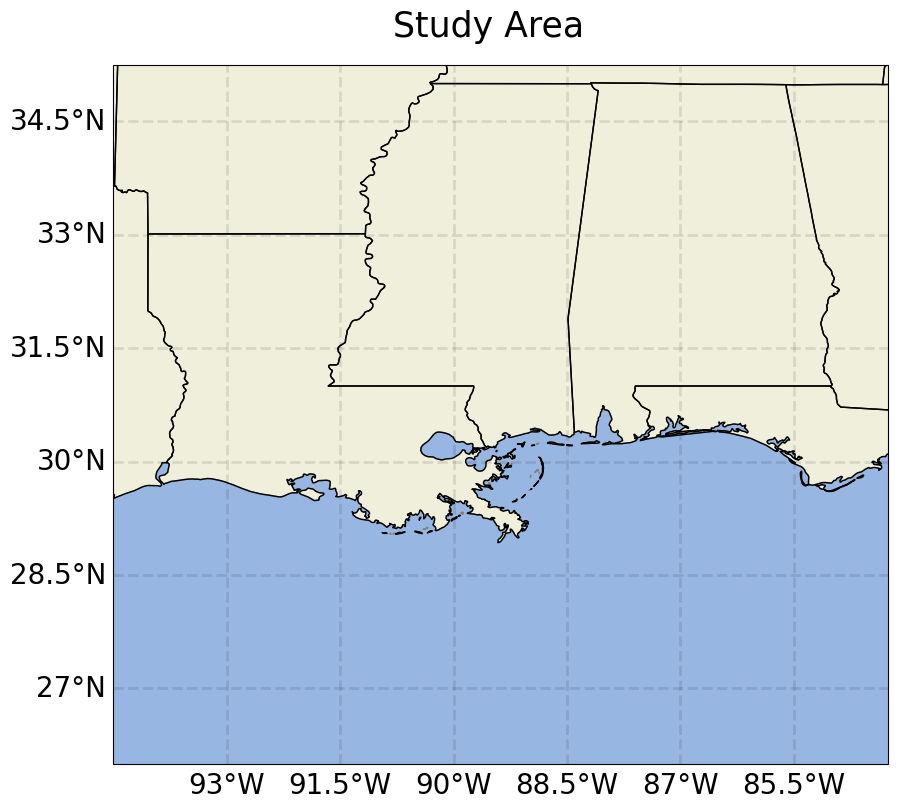

In [6]:
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 10))
fig.suptitle('Study Area', fontsize=25,x=0.5,y=0.90)
plt.rcParams.update({'font.size': 20})
m=plt.axes(projection=ccrs.PlateCarree())
m.set_extent([-94.5, -84.25, 26.00, 35.25], ccrs.PlateCarree())
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAND, edgecolor='grey')
#m.add_feature(cartopy.feature.LAKES, edgecolor='black')
m.add_feature(cartopy.feature.STATES)
gl = m.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.1, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

## Description of this notebook
As mentioned before, we downscaled and bias corrected 5 GCMs for 9 variables in the study area with spatial resolution of about 25 km. For demostration purpose in this notebook, we will show the results of one GCM for 2 variables (daily maximum temperature and precipitation). The chosen GCM's name is EC-Earth3, which is one of the widely used GCMs. The two variables will be shown in two separate sections. Section 1 will show the spatial distribution of long term mean and annual averaged time series for maximum temparure. Section 2 will show the same statistics but for daily precipitation.

## Section 1: Daily maximum temperature
This section will show the statistical results for daily maximum temperature (tasmax) including long term mean and annual averaged time series both for historical and projection periods. 

In [1]:
# import packages
import numpy as np
import xarray as xr

In [2]:
# download ERA5 daily maximum temperature data as observed historical data with wget
!wget https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/ERA5-single-daily/tasmax_1959-2014_daily_invert.nc

--2023-03-23 14:29:30--  https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/ERA5-single-daily/tasmax_1959-2014_daily_invert.nc
Resolving renc.osn.xsede.org (renc.osn.xsede.org)... 152.54.11.36, 152.54.11.37, 152.54.11.38
Connecting to renc.osn.xsede.org (renc.osn.xsede.org)|152.54.11.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 754427808 (719M) [application/x-netcdf]
Saving to: ‘tasmax_1959-2014_daily_invert.nc’

tasmax_1959-2014_da 100%[===================>] 719.48M  3.25MB/s    in 4m 13s  

2023-03-23 14:33:44 (2.84 MB/s) - ‘tasmax_1959-2014_daily_invert.nc’ saved [754427808/754427808]



In [3]:
# load bias corrected and downscaled EC_Earth3 projection data for ssp126 and rename it
!wget https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/QDM/EC-Earth3/ssp126/tasmax_QDM_2015-2100.nc
!mv tasmax_QDM_2015-2100.nc tasmax_QDM_2015-2100_ssp126.nc

--2023-03-23 14:37:46--  https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/QDM/EC-Earth3/ssp126/tasmax_QDM_2015-2100.nc
Resolving renc.osn.xsede.org (renc.osn.xsede.org)... 152.54.11.38, 152.54.11.36, 152.54.11.37
Connecting to renc.osn.xsede.org (renc.osn.xsede.org)|152.54.11.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200781136 (191M) [application/x-netcdf]
Saving to: ‘tasmax_QDM_2015-2100.nc’

tasmax_QDM_2015-210 100%[===================>] 191.48M  55.8MB/s    in 3.6s    

2023-03-23 14:37:50 (52.8 MB/s) - ‘tasmax_QDM_2015-2100.nc’ saved [200781136/200781136]



In [4]:
# load bias corrected and downscaled EC_Earth3 projection data for ssp585
!wget https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/QDM/EC-Earth3/ssp585/tasmax_QDM_2015-2100.nc
!mv tasmax_QDM_2015-2100.nc tasmax_QDM_2015-2100_ssp585.nc

--2023-03-23 14:39:31--  https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/QDM/EC-Earth3/ssp585/tasmax_QDM_2015-2100.nc
Resolving renc.osn.xsede.org (renc.osn.xsede.org)... 152.54.11.37, 152.54.11.36, 152.54.11.38
Connecting to renc.osn.xsede.org (renc.osn.xsede.org)|152.54.11.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200781136 (191M) [application/x-netcdf]
Saving to: ‘tasmax_QDM_2015-2100.nc’

tasmax_QDM_2015-210 100%[===================>] 191.48M  59.9MB/s    in 3.3s    

2023-03-23 14:39:35 (57.2 MB/s) - ‘tasmax_QDM_2015-2100.nc’ saved [200781136/200781136]



In [6]:
# load ERA5 historical data
hist_tasmax=xr.open_dataset('tasmax_1959-2014_daily_invert.nc',
                       engine='netcdf4', decode_times=False)
tasmax_hist=hist_tasmax.t2m[7305:,5:43,19:61]-273.15
time_hist=hist_tasmax.time[7305:]
import pandas as pd
date_hist=pd.to_datetime(time_hist, unit='h', origin=pd.Timestamp('1900-01-01 00:00:00'))
tasmax_hist_array=xr.DataArray(tasmax_hist.data, coords={'time': tasmax_hist.time, 'latitude': tasmax_hist.latitude,'longitude': tasmax_hist.longitude}, dims=["time", "latitude", "longitude"])
tasmax_hist_date=tasmax_hist_array.assign_coords(time=date_hist)
tasmax_hist_yearly=tasmax_hist_date.resample(time='Y', closed='right').mean(dim='time')
tasmax_hist_yearly_area_mean=np.mean(tasmax_hist_yearly.values, axis=(1,2))

/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


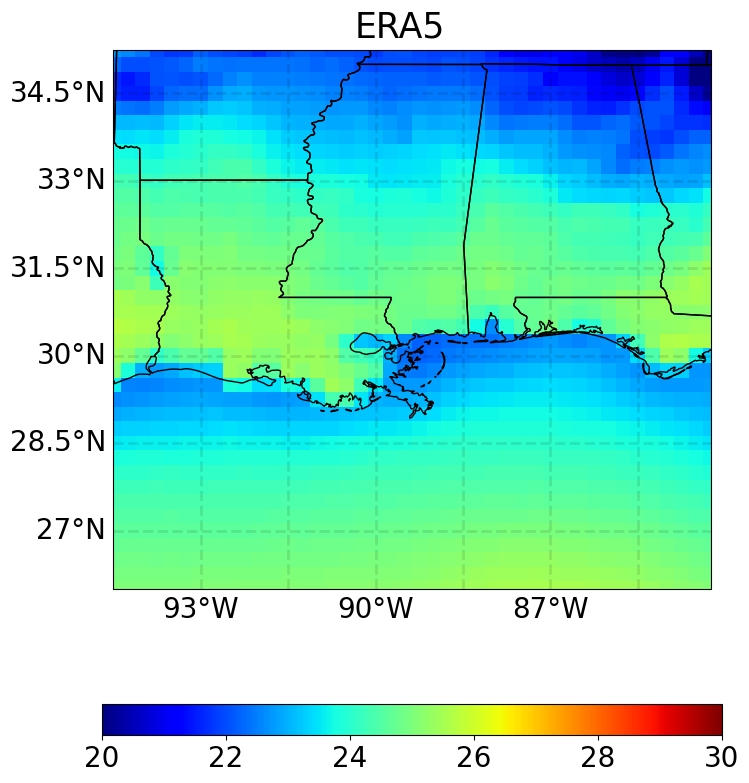

In [9]:
#spatial distribution of long term mean for ERA5 data
# for ERA5 from 1979 to 2014
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(10, 10))
fig.suptitle('ERA5', fontsize=25,x=0.5,y=0.92)
plt.rcParams.update({'font.size': 20})
m=plt.axes(projection=ccrs.PlateCarree())
m.set_extent([-94.5, -84.25, 26.00, 35.25], ccrs.PlateCarree())
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAND, edgecolor='grey')
m.add_feature(cartopy.feature.STATES)
c=m.pcolormesh(hist_tasmax.longitude.data[19:61], hist_tasmax.latitude.data[5:43], np.mean(hist_tasmax.t2m[7305:,5:43,19:61]-273.15, axis=0), transform=ccrs.PlateCarree(),vmin=20, vmax=30, cmap='jet')
plt.colorbar(c, orientation="horizontal", shrink=0.8)
gl = m.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.1, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

#plt.savefig("tasmax_ERA5_spatial.jpg", bbox_inches='tight', dpi=300)

In [7]:
# load EC_Earth3 ssp126
Earth3_ssp126_tasmax=xr.open_dataset('tasmax_QDM_2015-2100_ssp126.nc',
                       engine='netcdf4', decode_times=False)
Earth3_tasmax_ssp126=Earth3_ssp126_tasmax.tasmax
Earth3_time_ssp126=Earth3_ssp126_tasmax.time
import pandas as pd
Earth3_date_ssp126=pd.to_datetime(Earth3_time_ssp126, unit='D', origin=pd.Timestamp('1850-01-01 00:00:00'))
Earth3_tasmax_ssp126_array=xr.DataArray(Earth3_tasmax_ssp126.data, coords={'time': Earth3_tasmax_ssp126.time, 'lat': Earth3_tasmax_ssp126.lat,'lon': Earth3_tasmax_ssp126.lon}, dims=["time", "lat", "lon"])
Earth3_tasmax_ssp126_date=Earth3_tasmax_ssp126_array.assign_coords(time=Earth3_date_ssp126)
Earth3_tasmax_ssp126_yearly=Earth3_tasmax_ssp126_date.resample(time='Y', closed='right').mean(dim='time')
Earth3_tasmax_ssp126_yearly_area_mean=np.mean(Earth3_tasmax_ssp126_yearly.values, axis=(1,2))

/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


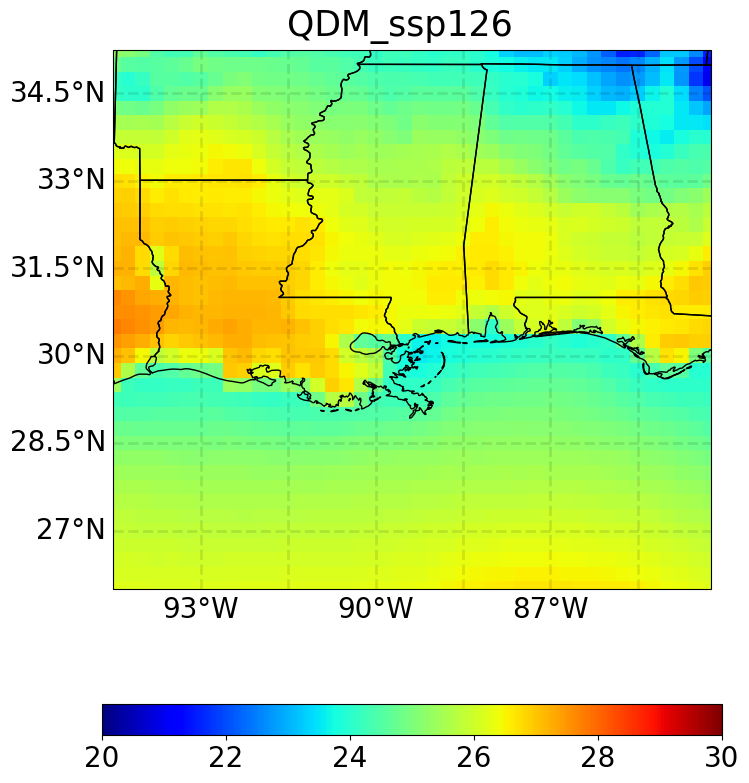

In [10]:
#spatial distribution of long term mean for ssp126 emission level
# bias corrected and downscaled for EC-Earth3 from 2015 to 2100
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(10, 10))
fig.suptitle('QDM_ssp126', fontsize=25,x=0.5,y=0.92)
plt.rcParams.update({'font.size': 20})
m=plt.axes(projection=ccrs.PlateCarree())
m.set_extent([-94.5, -84.25, 26.00, 35.25], ccrs.PlateCarree())
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAND, edgecolor='grey')
#m.add_feature(cartopy.feature.LAKES, edgecolor='black')
m.add_feature(cartopy.feature.STATES)
#m.gridlines()
c=m.pcolormesh(hist_tasmax.longitude.data[19:61], hist_tasmax.latitude.data[5:43], np.mean(Earth3_tasmax_ssp126.data, axis=0), transform=ccrs.PlateCarree(),vmin=20, vmax=30, cmap='jet')
#c=m.pcolormesh(merra2.lon.data, merra2.lat.data, tp_merra2_test[23300,:,:], transform=ccrs.PlateCarree(),vmin=0.0, vmax=20, cmap='jet')
#c=m.pcolormesh(merra2.lon.data, merra2.lat.data, np.mean(merra2.tp[:23330,:,:].values, axis=0), transform=ccrs.PlateCarree(),vmin=0.08, vmax=0.24, cmap='jet')
plt.colorbar(c, orientation="horizontal", shrink=0.8)
gl = m.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.1, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

#plt.savefig("tasmax_QDM_ssp126_spatial.jpg", bbox_inches='tight', dpi=300)

In [8]:
# load EC_Earth3 ssp585
Earth3_ssp585_tasmax=xr.open_dataset('tasmax_QDM_2015-2100_ssp585.nc',
                       engine='netcdf4', decode_times=False)
Earth3_tasmax_ssp585=Earth3_ssp585_tasmax.tasmax
Earth3_time_ssp585=Earth3_ssp585_tasmax.time
import pandas as pd
Earth3_date_ssp585=pd.to_datetime(Earth3_time_ssp585, unit='D', origin=pd.Timestamp('1850-01-01 00:00:00'))
Earth3_tasmax_ssp585_array=xr.DataArray(Earth3_tasmax_ssp585.data, coords={'time': Earth3_tasmax_ssp585.time, 'lat': Earth3_tasmax_ssp585.lat,'lon': Earth3_tasmax_ssp585.lon}, dims=["time", "lat", "lon"])
Earth3_tasmax_ssp585_date=Earth3_tasmax_ssp585_array.assign_coords(time=Earth3_date_ssp585)
Earth3_tasmax_ssp585_yearly=Earth3_tasmax_ssp585_date.resample(time='Y', closed='right').mean(dim='time')
Earth3_tasmax_ssp585_yearly_area_mean=np.mean(Earth3_tasmax_ssp585_yearly.values, axis=(1,2))

/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


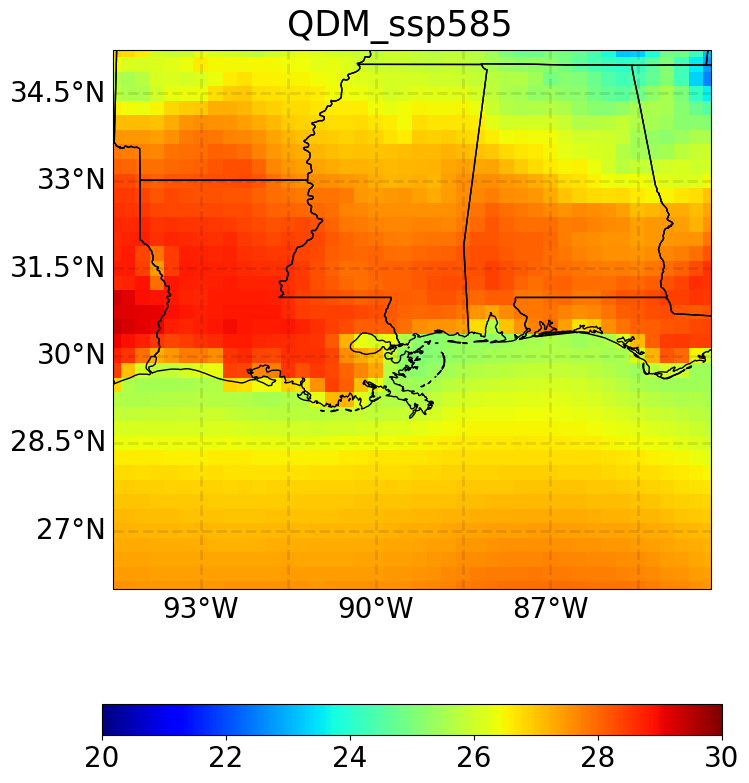

In [11]:
#spatial distribution of long term mean for ssp585 emission level
# bias corrected and downscaled for EC-Earth3 from 2015 to 2100
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(10, 10))
fig.suptitle('QDM_ssp585', fontsize=25,x=0.5,y=0.92)
plt.rcParams.update({'font.size': 20})
m=plt.axes(projection=ccrs.PlateCarree())
m.set_extent([-94.5, -84.25, 26.00, 35.25], ccrs.PlateCarree())
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAND, edgecolor='grey')
m.add_feature(cartopy.feature.STATES)
c=m.pcolormesh(hist_tasmax.longitude.data[19:61], hist_tasmax.latitude.data[5:43], np.mean(Earth3_tasmax_ssp585.data, axis=0), transform=ccrs.PlateCarree(),vmin=20, vmax=30, cmap='jet')
plt.colorbar(c, orientation="horizontal", shrink=0.8)
gl = m.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.1, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

#plt.savefig("tasmax_QDM_ssp585_spatial.jpg", bbox_inches='tight', dpi=300)

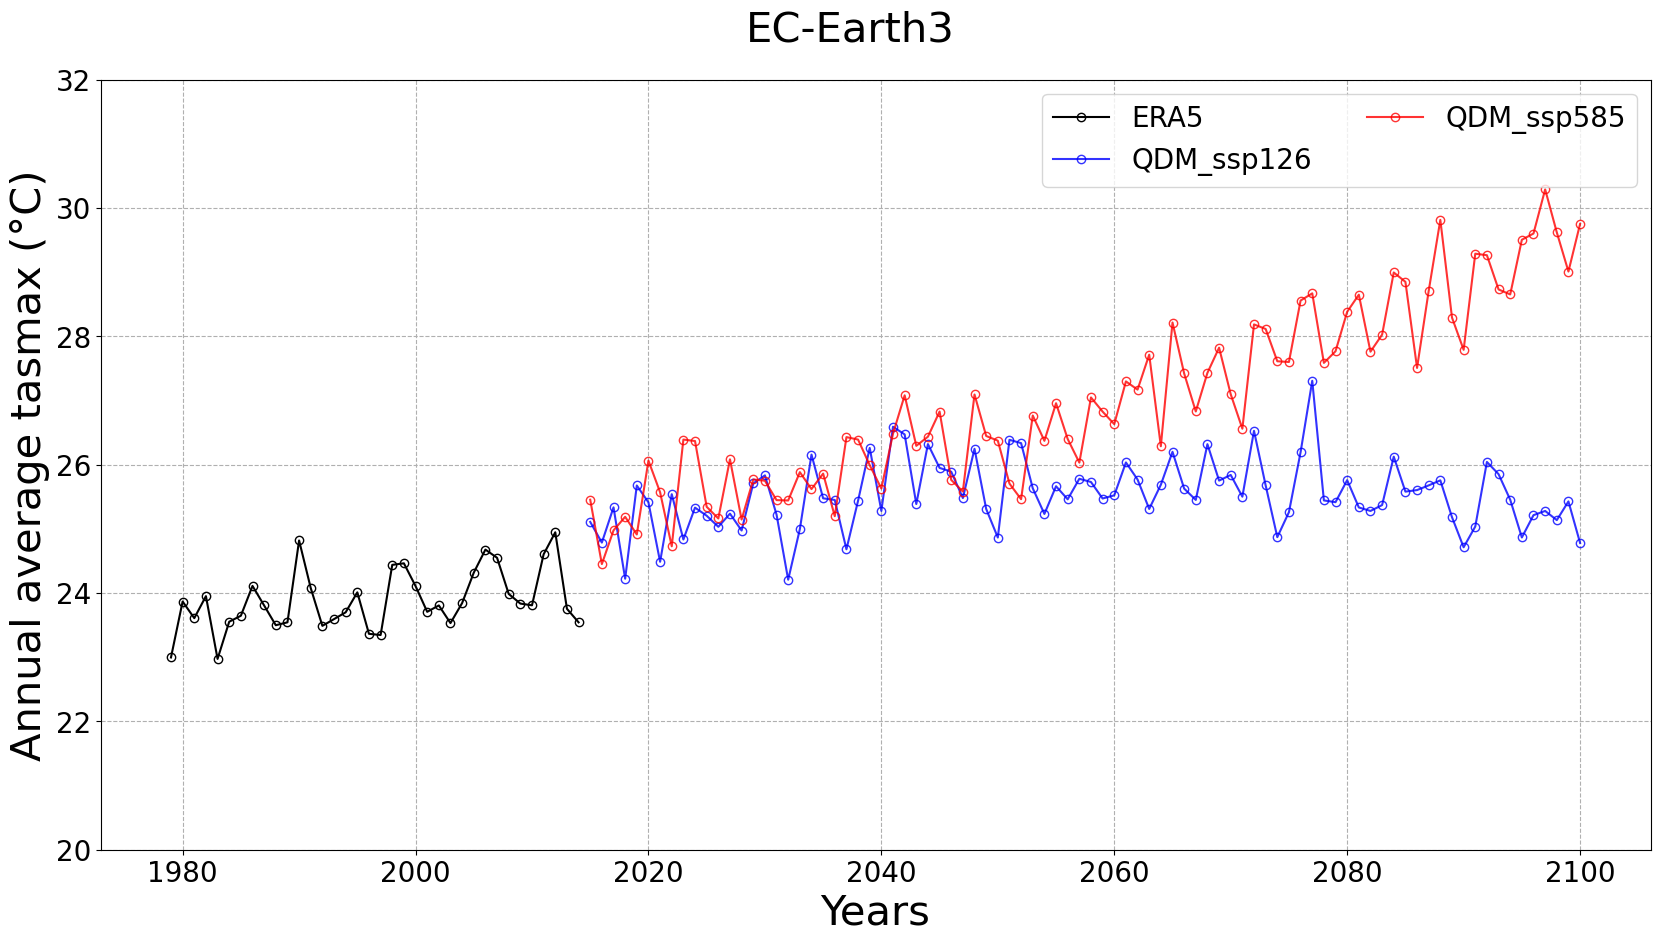

In [13]:
# demostrate annual averaged time series for historical, ssp126 and ssp585
import matplotlib.pyplot as plt
names=[np.datetime64(u,'Y') for u in tasmax_hist_yearly.time.data]
names_ssp=[np.datetime64(u,'Y') for u in Earth3_tasmax_ssp126_yearly.time.data]
fig, ax = plt.subplots(figsize=(20, 10))
fig.suptitle('EC-Earth3', fontsize=30, x=0.5, y=0.95)
plt.rcParams.update({'font.size': 20})
ax.plot(names, tasmax_hist_yearly_area_mean, color='black', marker="o",mfc='none',label="ERA5")
ax.plot(names_ssp, Earth3_tasmax_ssp126_yearly_area_mean, color='blue', marker="o", mfc='none',label="QDM_ssp126", alpha=0.8)
ax.plot(names_ssp, Earth3_tasmax_ssp585_yearly_area_mean, color='red',  marker="o",mfc='none',label="QDM_ssp585", alpha=0.8)
plt.xticks(rotation=0)
plt.xlabel('Years', fontsize=30)
plt.ylabel('Annual average tasmax (°C)', fontsize=30)
plt.grid(True, linestyle='--') 
plt.ylim(20, 32)
ax.legend(ncol=2)

#plt.savefig("tasmax_QDM_EC-Earth3.jpg", bbox_inches='tight', dpi=300)

## Section 2: Daily precipitation
This section will show the statistical results for daily precipitation (pr) including long term mean and annual total precipitation time series both for historical and projection periods.

In [14]:
# download ERA5 precipitaton data as observed historical precipitatiodata with wget
!wget https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/ERA5-single-daily/pr_1959-2014_daily_invert.nc

--2023-03-23 15:04:08--  https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/ERA5-single-daily/pr_1959-2014_daily_invert.nc
Resolving renc.osn.xsede.org (renc.osn.xsede.org)... 152.54.11.36, 152.54.11.37, 152.54.11.38
Connecting to renc.osn.xsede.org (renc.osn.xsede.org)|152.54.11.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 754427768 (719M) [application/x-netcdf]
Saving to: ‘pr_1959-2014_daily_invert.nc’

pr_1959-2014_daily_ 100%[===================>] 719.48M  2.96MB/s    in 4m 22s  

2023-03-23 15:08:31 (2.74 MB/s) - ‘pr_1959-2014_daily_invert.nc’ saved [754427768/754427768]



In [15]:
# load bias corrected and downscaled EC_Earth3 projection data for ssp126 and rename it
!wget https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/QDM/EC-Earth3/ssp126/pr_QDM_2015-2100.nc
!mv pr_QDM_2015-2100.nc pr_QDM_2015-2100_ssp126.nc

--2023-03-23 15:09:50--  https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/QDM/EC-Earth3/ssp126/pr_QDM_2015-2100.nc
Resolving renc.osn.xsede.org (renc.osn.xsede.org)... 152.54.11.36, 152.54.11.38, 152.54.11.37
Connecting to renc.osn.xsede.org (renc.osn.xsede.org)|152.54.11.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200781088 (191M) [application/x-netcdf]
Saving to: ‘pr_QDM_2015-2100.nc’

pr_QDM_2015-2100.nc 100%[===================>] 191.48M  3.08MB/s    in 72s     

2023-03-23 15:11:03 (2.65 MB/s) - ‘pr_QDM_2015-2100.nc’ saved [200781088/200781088]



In [16]:
# load bias corrected and downscaled EC_Earth3 projection data for ssp585
!wget https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/QDM/EC-Earth3/ssp585/pr_QDM_2015-2100.nc
!mv pr_QDM_2015-2100.nc pr_QDM_2015-2100_ssp585.nc

--2023-03-23 15:11:16--  https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/QDM/EC-Earth3/ssp585/pr_QDM_2015-2100.nc
Resolving renc.osn.xsede.org (renc.osn.xsede.org)... 152.54.11.38, 152.54.11.36, 152.54.11.37
Connecting to renc.osn.xsede.org (renc.osn.xsede.org)|152.54.11.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200781088 (191M) [application/x-netcdf]
Saving to: ‘pr_QDM_2015-2100.nc’

pr_QDM_2015-2100.nc 100%[===================>] 191.48M  58.8MB/s    in 3.5s    

2023-03-23 15:11:20 (55.1 MB/s) - ‘pr_QDM_2015-2100.nc’ saved [200781088/200781088]



In [17]:
# load ERA5 historical data
hist_pr=xr.open_dataset('pr_1959-2014_daily_invert.nc',
                       engine='netcdf4', decode_times=False)
pr_hist=hist_pr.tp[7305:,5:43,19:61]
time_hist=hist_pr.time[7305:]
import pandas as pd
date_hist=pd.to_datetime(time_hist, unit='h', origin=pd.Timestamp('1900-01-01 00:00:00'))
pr_hist_array=xr.DataArray(pr_hist.data, coords={'time': pr_hist.time, 'latitude': pr_hist.latitude,'longitude': pr_hist.longitude}, dims=["time", "latitude", "longitude"])
pr_hist_date=pr_hist_array.assign_coords(time=date_hist)
pr_hist_yearly=pr_hist_date.resample(time='Y', closed='right').sum(dim='time')
pr_hist_yearly_area_mean=np.mean(pr_hist_yearly.values, axis=(1,2))*1000

/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


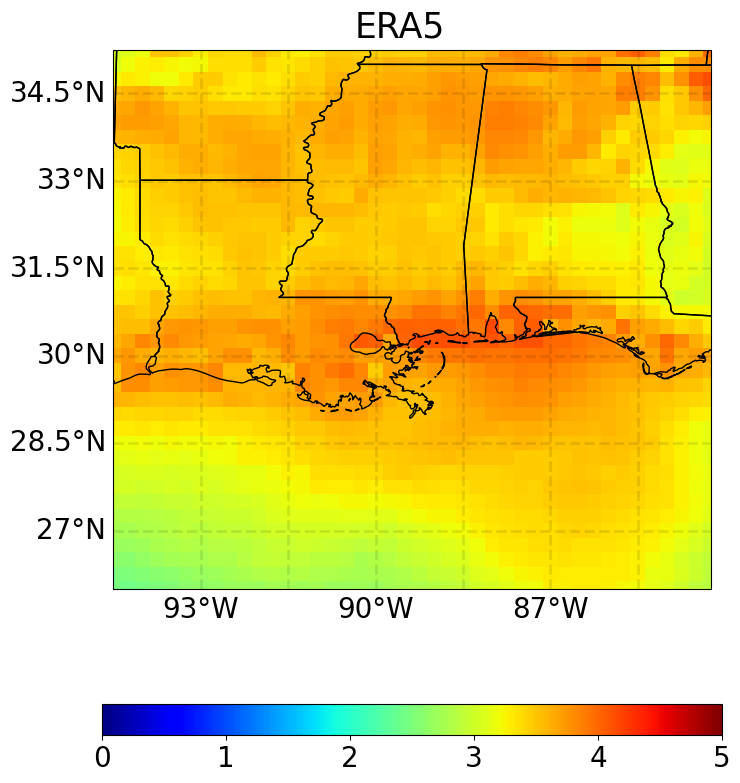

In [20]:
#spatial distribution of long term mean for ERA5 data
# for ERA5 from 1979 to 2014
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(10, 10))
fig.suptitle('ERA5', fontsize=25,x=0.5,y=0.92)
plt.rcParams.update({'font.size': 20})
m=plt.axes(projection=ccrs.PlateCarree())
m.set_extent([-94.5, -84.25, 26.00, 35.25], ccrs.PlateCarree())
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAND, edgecolor='grey')
#m.add_feature(cartopy.feature.LAKES, edgecolor='black')
m.add_feature(cartopy.feature.STATES)
#m.gridlines()
c=m.pcolormesh(hist_pr.longitude.data[19:61], hist_pr.latitude.data[5:43], np.mean(pr_hist.data*1000, axis=0), transform=ccrs.PlateCarree(),vmin=0, vmax=5, cmap='jet')
#c=m.pcolormesh(merra2.lon.data, merra2.lat.data, tp_merra2_test[23300,:,:], transform=ccrs.PlateCarree(),vmin=0.0, vmax=20, cmap='jet')
#c=m.pcolormesh(merra2.lon.data, merra2.lat.data, np.mean(merra2.tp[:23330,:,:].values, axis=0), transform=ccrs.PlateCarree(),vmin=0.08, vmax=0.24, cmap='jet')
plt.colorbar(c, orientation="horizontal", shrink=0.8)
gl = m.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.1, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

#plt.savefig("pr_QDM_ssp126_spatial.jpg", bbox_inches='tight', dpi=300)

In [22]:
Earth3_ssp126_pr=xr.open_dataset('pr_QDM_2015-2100_ssp126.nc',
                       engine='netcdf4', decode_times=False)
Earth3_pr_ssp126=Earth3_ssp126_pr.pr
Earth3_time_ssp126=Earth3_ssp126_pr.time
import pandas as pd
Earth3_date_ssp126=pd.to_datetime(Earth3_time_ssp126, unit='D', origin=pd.Timestamp('1850-01-01 00:00:00'))
Earth3_pr_ssp126_array=xr.DataArray(Earth3_pr_ssp126.data, coords={'time': Earth3_pr_ssp126.time, 'lat': Earth3_pr_ssp126.lat,'lon': Earth3_pr_ssp126.lon}, dims=["time", "lat", "lon"])
Earth3_pr_ssp126_date=Earth3_pr_ssp126_array.assign_coords(time=Earth3_date_ssp126)
Earth3_pr_ssp126_yearly=Earth3_pr_ssp126_date.resample(time='Y', closed='right').sum(dim='time')
Earth3_pr_ssp126_yearly_area_mean=np.mean(Earth3_pr_ssp126_yearly.values, axis=(1,2))

/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


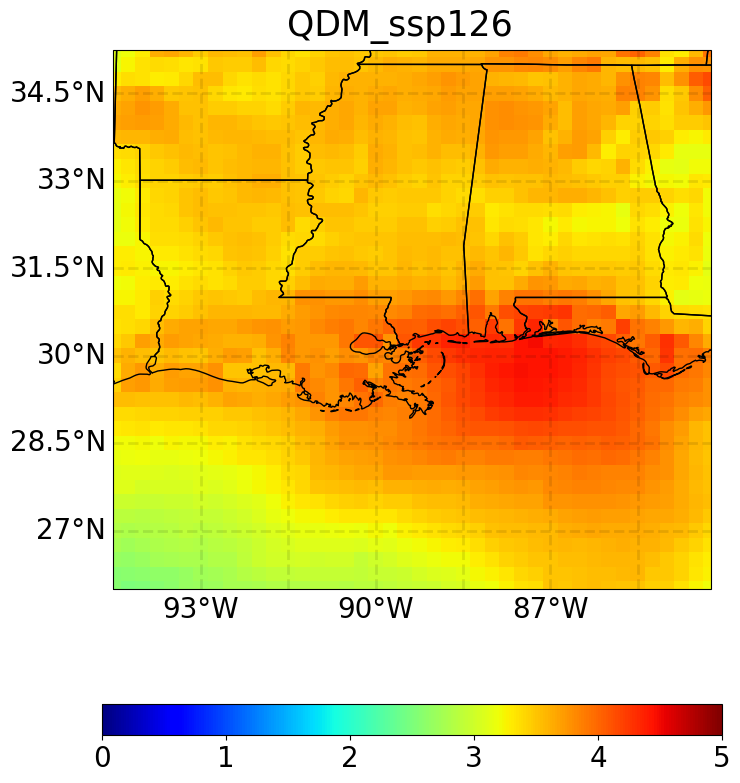

In [23]:
#spatial distribution of long term mean for ssp126 emission level
# bias corrected and downscaled for EC-Earth3 from 2015 to 2100
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(10, 10))
fig.suptitle('QDM_ssp126', fontsize=25,x=0.5,y=0.92)
plt.rcParams.update({'font.size': 20})
m=plt.axes(projection=ccrs.PlateCarree())
m.set_extent([-94.5, -84.25, 26.00, 35.25], ccrs.PlateCarree())
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAND, edgecolor='grey')
m.add_feature(cartopy.feature.STATES)
c=m.pcolormesh(hist_pr.longitude.data[19:61], hist_pr.latitude.data[5:43], np.mean(Earth3_pr_ssp126.data, axis=0), transform=ccrs.PlateCarree(),vmin=0, vmax=5, cmap='jet')
plt.colorbar(c, orientation="horizontal", shrink=0.8)
gl = m.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.1, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

#plt.savefig("pr_QDM_ssp126_spatial.jpg", bbox_inches='tight', dpi=300)

In [24]:
Earth3_ssp585_pr=xr.open_dataset('pr_QDM_2015-2100_ssp585.nc',
                       engine='netcdf4', decode_times=False)
Earth3_pr_ssp585=Earth3_ssp585_pr.pr
Earth3_time_ssp585=Earth3_ssp585_pr.time
import pandas as pd
Earth3_date_ssp585=pd.to_datetime(Earth3_time_ssp585, unit='D', origin=pd.Timestamp('1850-01-01 00:00:00'))
Earth3_pr_ssp585_array=xr.DataArray(Earth3_pr_ssp585.data, coords={'time': Earth3_pr_ssp585.time, 'lat': Earth3_pr_ssp585.lat,'lon': Earth3_pr_ssp585.lon}, dims=["time", "lat", "lon"])
Earth3_pr_ssp585_date=Earth3_pr_ssp585_array.assign_coords(time=Earth3_date_ssp585)
Earth3_pr_ssp585_yearly=Earth3_pr_ssp585_date.resample(time='Y', closed='right').sum(dim='time')
Earth3_pr_ssp585_yearly_area_mean=np.mean(Earth3_pr_ssp585_yearly.values, axis=(1,2))

/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


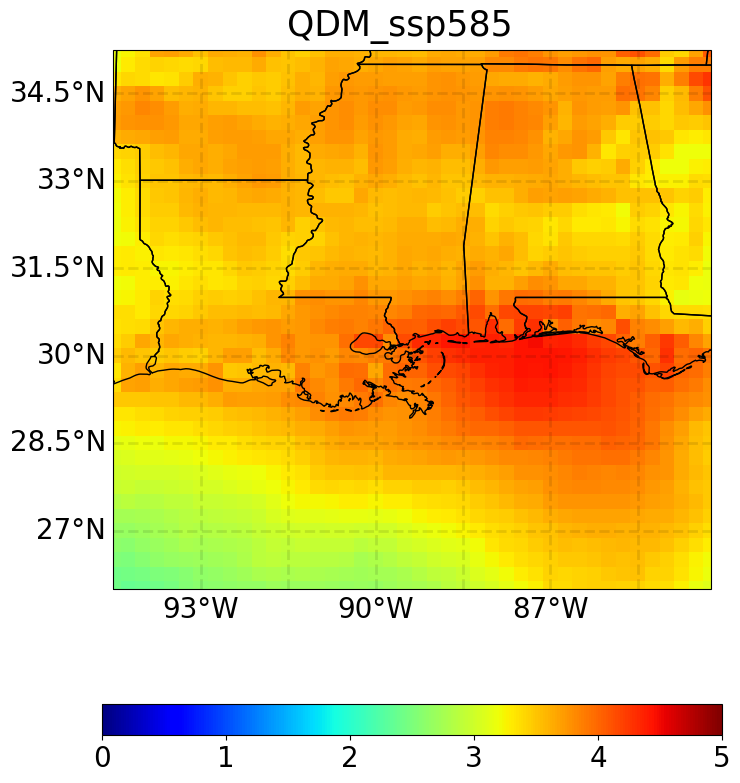

In [25]:
#spatial distribution of long term mean for ssp585 emission level
# bias corrected and downscaled for EC-Earth3 from 2015 to 2100
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(10, 10))
fig.suptitle('QDM_ssp585', fontsize=25,x=0.5,y=0.92)
plt.rcParams.update({'font.size': 20})
m=plt.axes(projection=ccrs.PlateCarree())
m.set_extent([-94.5, -84.25, 26.00, 35.25], ccrs.PlateCarree())
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAND, edgecolor='grey')
m.add_feature(cartopy.feature.STATES)
c=m.pcolormesh(hist_pr.longitude.data[19:61], hist_pr.latitude.data[5:43], np.mean(Earth3_pr_ssp585.data, axis=0), transform=ccrs.PlateCarree(),vmin=0, vmax=5, cmap='jet')
plt.colorbar(c, orientation="horizontal", shrink=0.8)
gl = m.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.1, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

#plt.savefig("pr_QDM_ssp585_spatial.jpg", bbox_inches='tight', dpi=300)

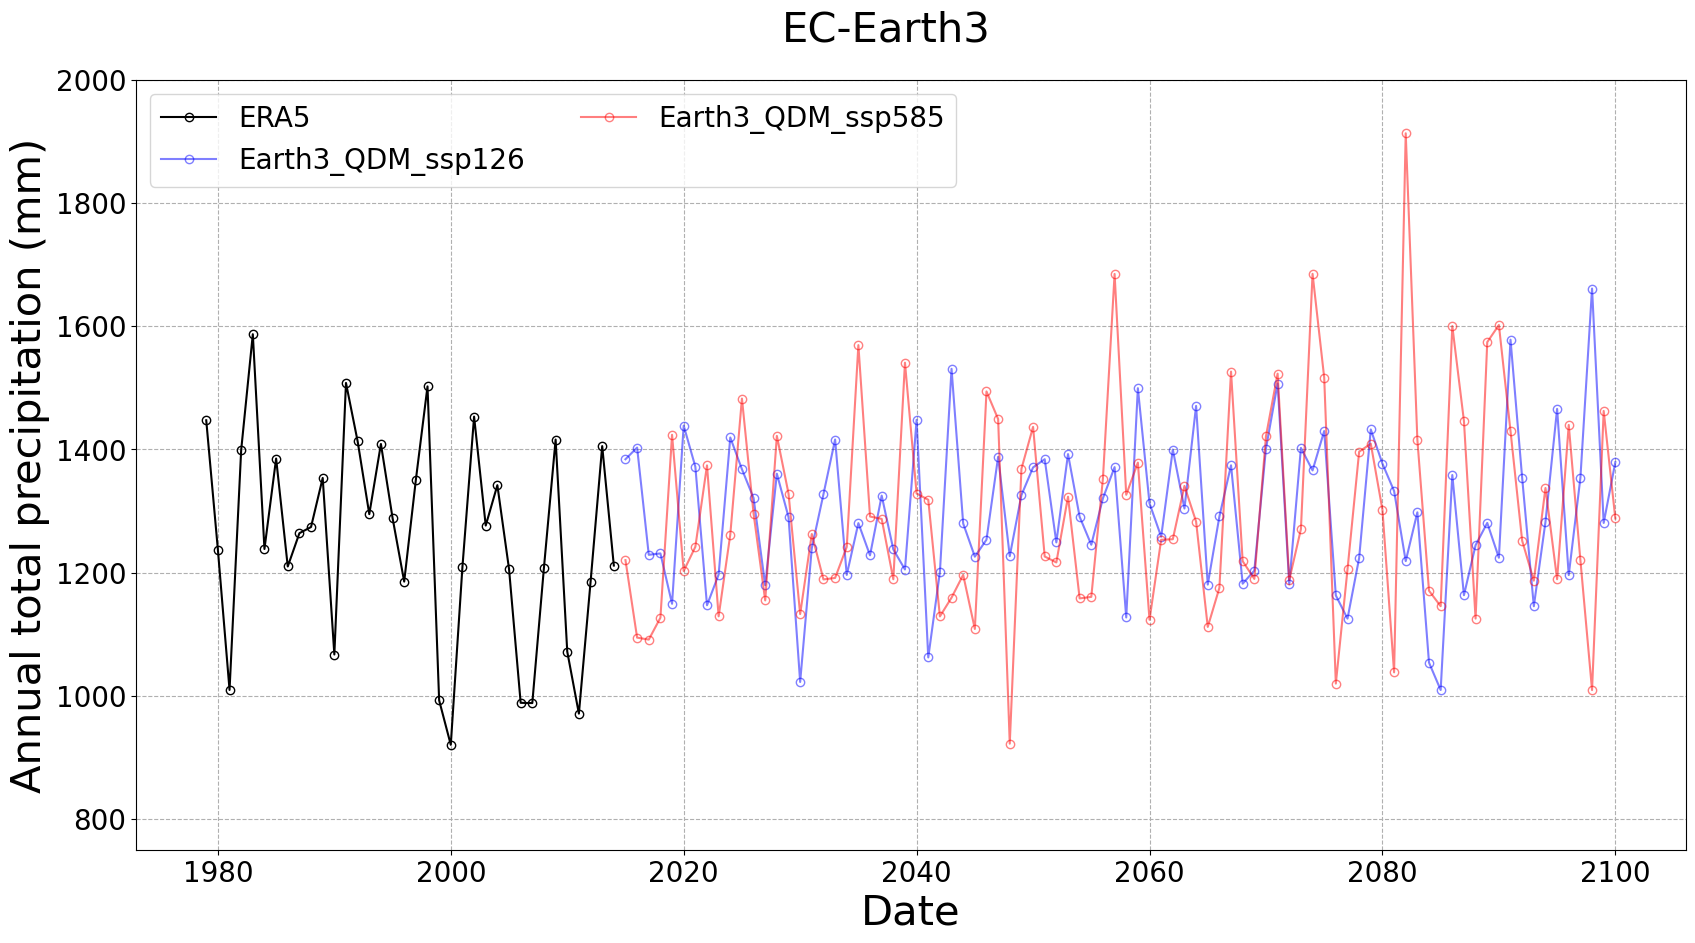

In [27]:
# demostrate annual total time series for historical, ssp126 and ssp585
import matplotlib.pyplot as plt
names=[np.datetime64(u,'Y') for u in pr_hist_yearly.time.data]
names_ssp=[np.datetime64(u,'Y') for u in Earth3_pr_ssp126_yearly.time.data]
fig, ax = plt.subplots(figsize=(20, 10))
fig.suptitle('EC-Earth3', fontsize=30, x=0.5, y=0.95)
plt.rcParams.update({'font.size': 20})
ax.plot(names, pr_hist_yearly_area_mean, color='black', marker="o",mfc='none',label="ERA5")
ax.plot(names_ssp, Earth3_pr_ssp126_yearly_area_mean, color='blue', marker="o", mfc='none',label="Earth3_QDM_ssp126", alpha=0.5)
ax.plot(names_ssp, Earth3_pr_ssp585_yearly_area_mean, color='red',  marker="o",mfc='none',label="Earth3_QDM_ssp585", alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Annual total precipitation (mm)', fontsize=30)
plt.grid(True, linestyle='--') 
plt.ylim(750, 2000)
#plt.grid(linestyle = '--', linewidth = 0.5)
ax.legend(ncol=2)
#plt.show()

#plt.savefig("Annual precipitation time series .jpg", bbox_inches='tight', dpi=300)